In [1]:
.libPaths(c("~/Rlibs_fgsea", .libPaths()))

In [2]:
source("../Utility/seurat_tools.r")
source("../Utility/plots.r")
source("../Utility/markers_utility.r")
source("../Utility/enrichment.r")
source("../Utility/cell_cycle_scoring.r")

In [3]:
library(Seurat)
library(qs)
library(ggplot2)
library(ggbeeswarm)
library(dplyr)

qs 0.27.2. Announcement: https://github.com/qsbase/qs/issues/103



In [4]:
seurat_obj <- qread("../Step5_Clustering/out/SCPCP000001/annotated_harmony_SCPCP000001_50_2000_3000.qs")

In [5]:
cell_order=c("T cells",
            "NK cells",
            "Naive B",
            "MGD TAM",
            "MGD Macrophage",
            "MD Macrophage",
            "Undetermined",
            "MES-APC-like",
            "MES-AC-like",
            "MES-AC-like Cycling",
            "OPC-like"
)

seurat_obj$cell_label <- factor(seurat_obj$cell_label, levels = cell_order)
seurat_obj <- SetIdent(seurat_obj, value = "cell_label")


## Base umap

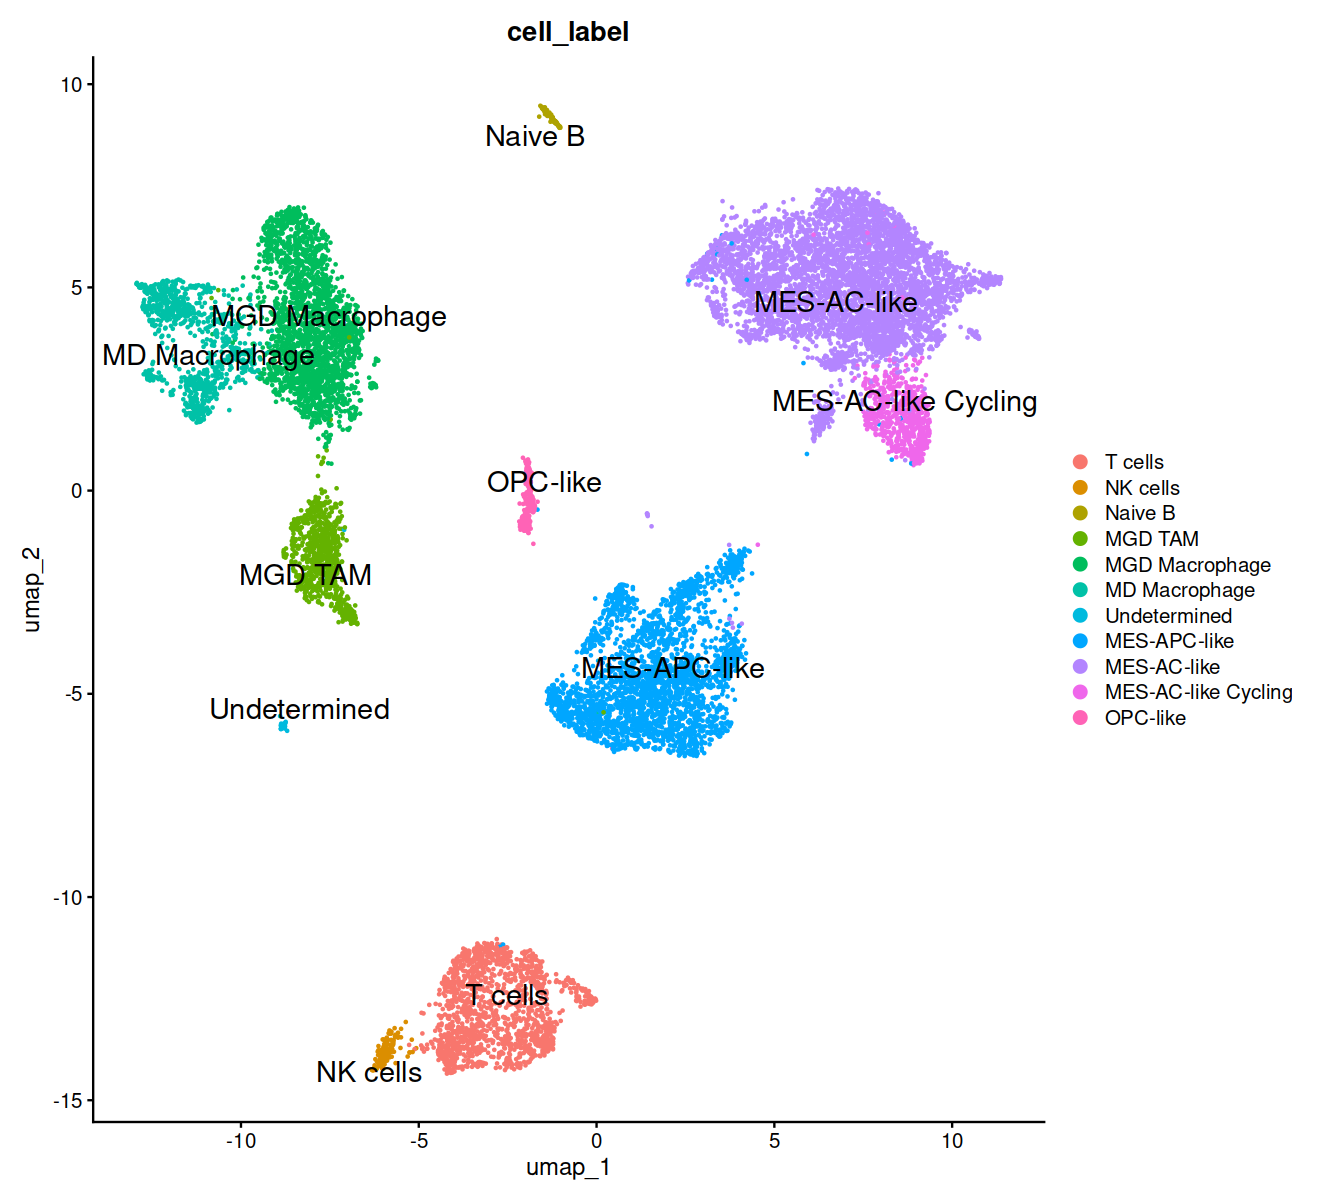

In [6]:
options(repr.plot.width=11, repr.plot.height=10)

p <- DimPlot(seurat_obj, group.by="cell_label", label=TRUE, label.size = 6, repel=TRUE) 
ggsave("./out/fig1/umap_base.png", p, dpi=600, height=10, width=11, create.dir = TRUE)
p

## Glio/HGG barplot

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


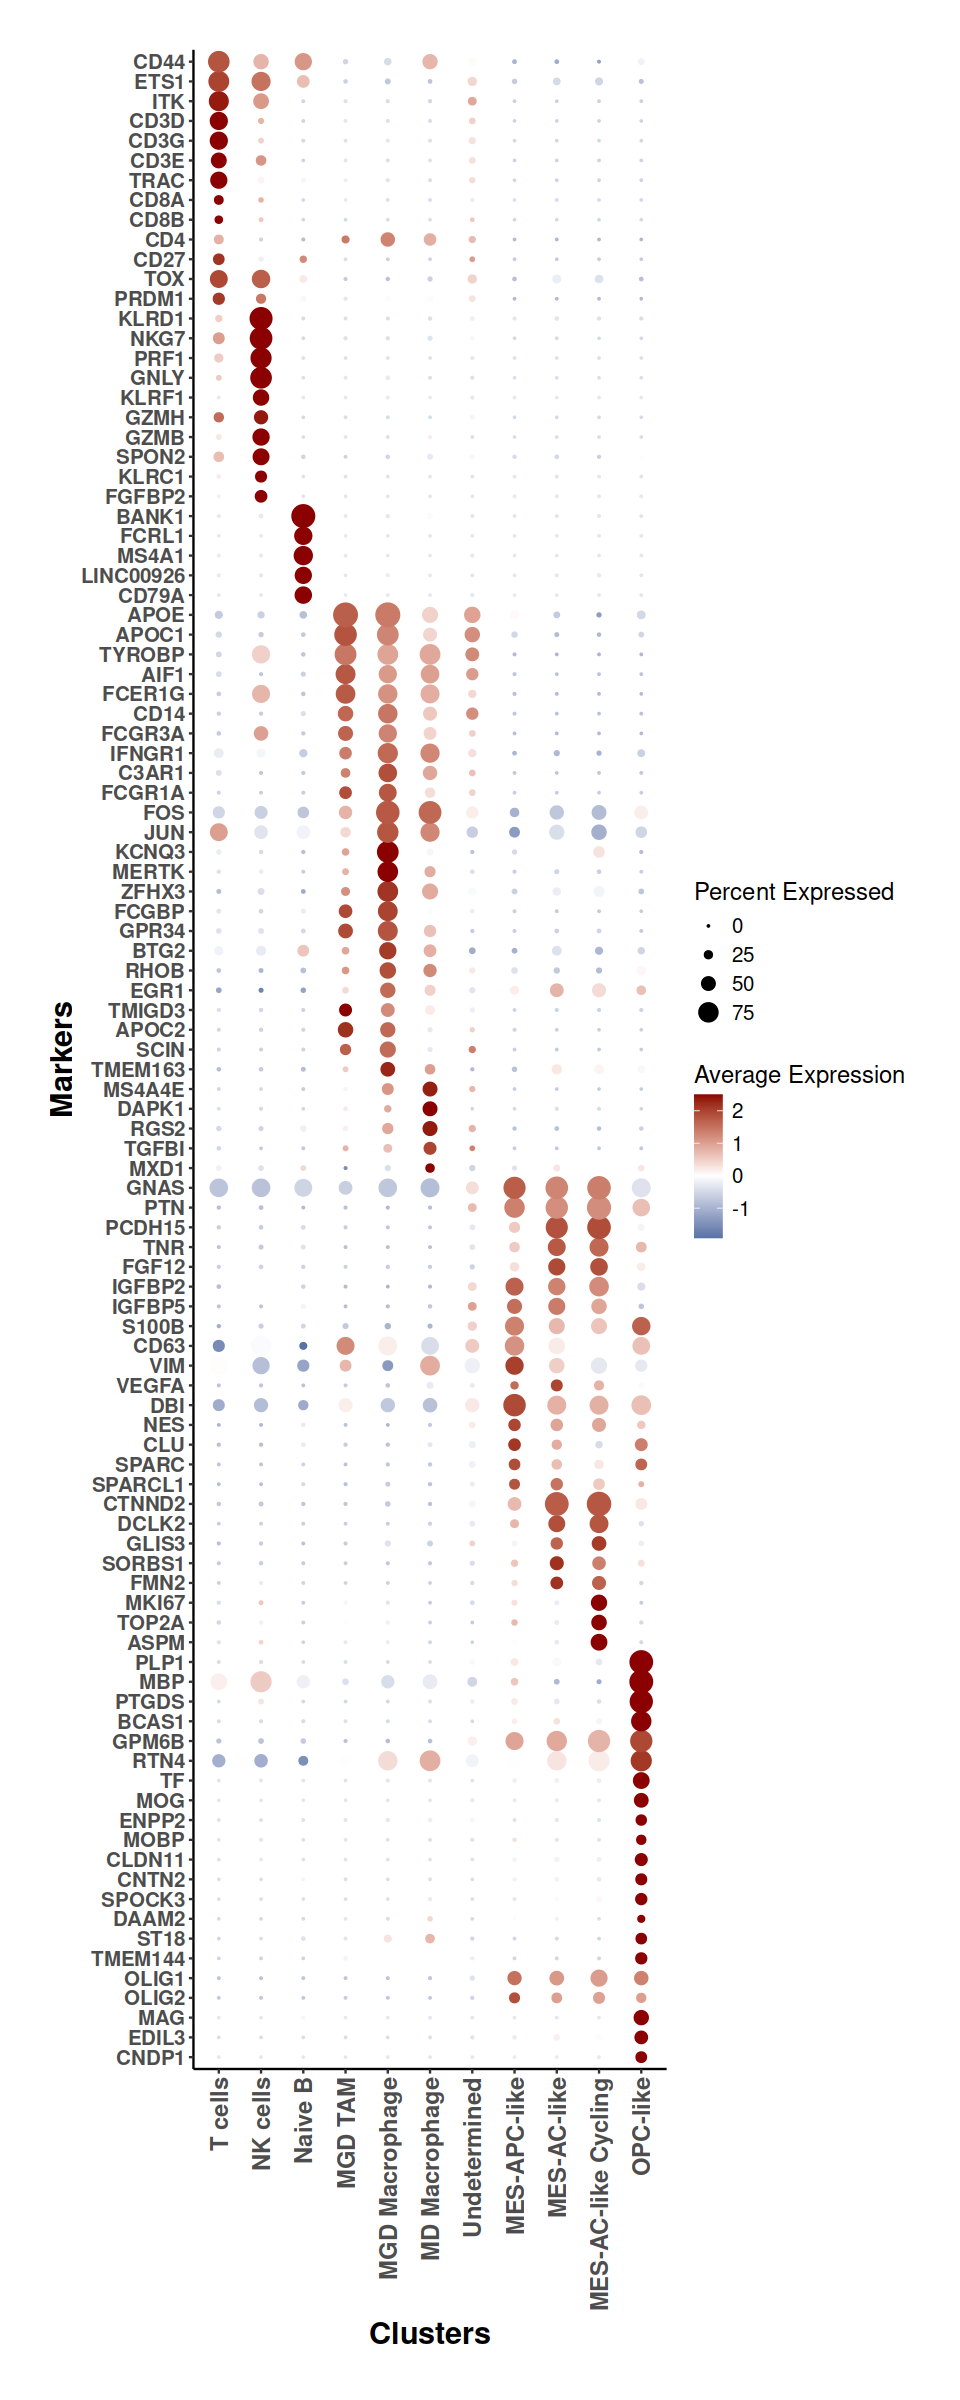

In [12]:
options(repr.plot.width=8, repr.plot.height=20)


marker_list_general <- list(

    "T Cell"                                      = c('CD44','ETS1','ITK','CD3D','CD3G','CD3E','ILR','TRAC',"CD8A","CD8B",'CD4','CD27'),
    "T Cell Exhausted"                            = c('TOX','PRDM1'),
    "NK"                                          = c('KLRD1','NKG7','PRF1','GNLY','KLRF1','GZMH','GZMB','SPON2','CD56','KLRC1','FGFBP2'),
    
    'Naive B'                                     = c('BANK1','FCRL1','MS4A1','LINC00926','CD79A'),
    
    'Macrophage'                                  = c("APOE",'APOC1','CD206','TYROBP','AIF1','FCER1G','CD14','FCGR3A','IFNGR1','C3AR1','FCGR1A','CX3XR1'),
    'Homeostatic/Transitioning Macrophage'        = c( "FOS","JUN","KCNQ3","MERTK","ZFHX3","FCGBP","P2RY","GPR34","BTG2","PRP14B","RHOB","EGR1"),
    
    'Microglia Derived TAMs'                      = c('TMIGD3', 'APOC2', 'SCIN'),
    "Bone-marrow Derived TAM"                     = c("TMEM163", "MS4A4E", "DAPK1","RGS2", "TGFBI","MXD1"),
    
    
    'MES-like'                                    = c('GNAS','PTN','PCDH15','TNR','FGF12','IGFBP2','IGFBP5','S100B','CD63','VIM','VEGFA'),
    'APC-like'                                    = c('DBI','CD63','NES','CLU','SPARC','SPARCL1'),
    'AC-like'                                     = c('CTNND2','DCLK2','GLIS3','ITRP2','SORBS1','FMN2','DCLR1'),
    
    'Cycling'                                     = c('MKI67','TOP2A','ASPM'),
    
    'OPC-like'                                    = c('PLP1','MBP','PTGDS','BCAS1','GPM6B','RTN4','TF','MOG','ENPP2','MOBP','CLDN11','UG8T','SBCA2','CNTN2','SPOCK3','DAAM2','ST18','TMEM144','ENPP2'),
    'OC-like'                                     = c('OLIG1','OLIG2','BCAS1','MAG','EDIL3','CNDP1','TF','PLP1','MOG','MBP')
    
)

marker_order <- names(marker_list_general)
all_markers <- rev(unique(unname(unlist(marker_list_general[marker_order]))))
all_markers <- unique(factor(all_markers, levels = all_markers))

existing_markers <- all_markers[all_markers %in% rownames(seurat_obj)]
p <- DotPlot(seurat_obj, 
                features = existing_markers, 
                 group.by = "cell_label", 
                 cols = c("dodgerblue4","white","darkred"),
                ) +
            scale_colour_gradient2(low = "dodgerblue4", mid = "white", high = "darkred") +
            theme_classic() +
            labs(y = "Clusters", x="Markers") +
                theme(
                     plot.margin = margin(30, 30, 30, 30, "pt"),
                     axis.title.y = element_text(face = "bold", size = 18),
                     axis.text.y = element_text(face = "bold", size = 12),
                     axis.title.x = element_text(face = "bold", size = 18),
                     axis.text.x = element_text(face = "bold", size = 14, angle = 90, hjust = 1, vjust = 0.5),
                     legend.text = element_text(size = 12),      
                     legend.title = element_text(size = 14)
                ) +
            coord_flip()



p

ggsave("./out/fig1/dotplot_all.png", p, dpi=600, height=25, width=8, create.dir = TRUE)


In [8]:
gsea_output <- qread("../Step5_Clustering/out/SCPCP000001/gsea_harmony_SCPCP000001_50_2000_3000.qs")

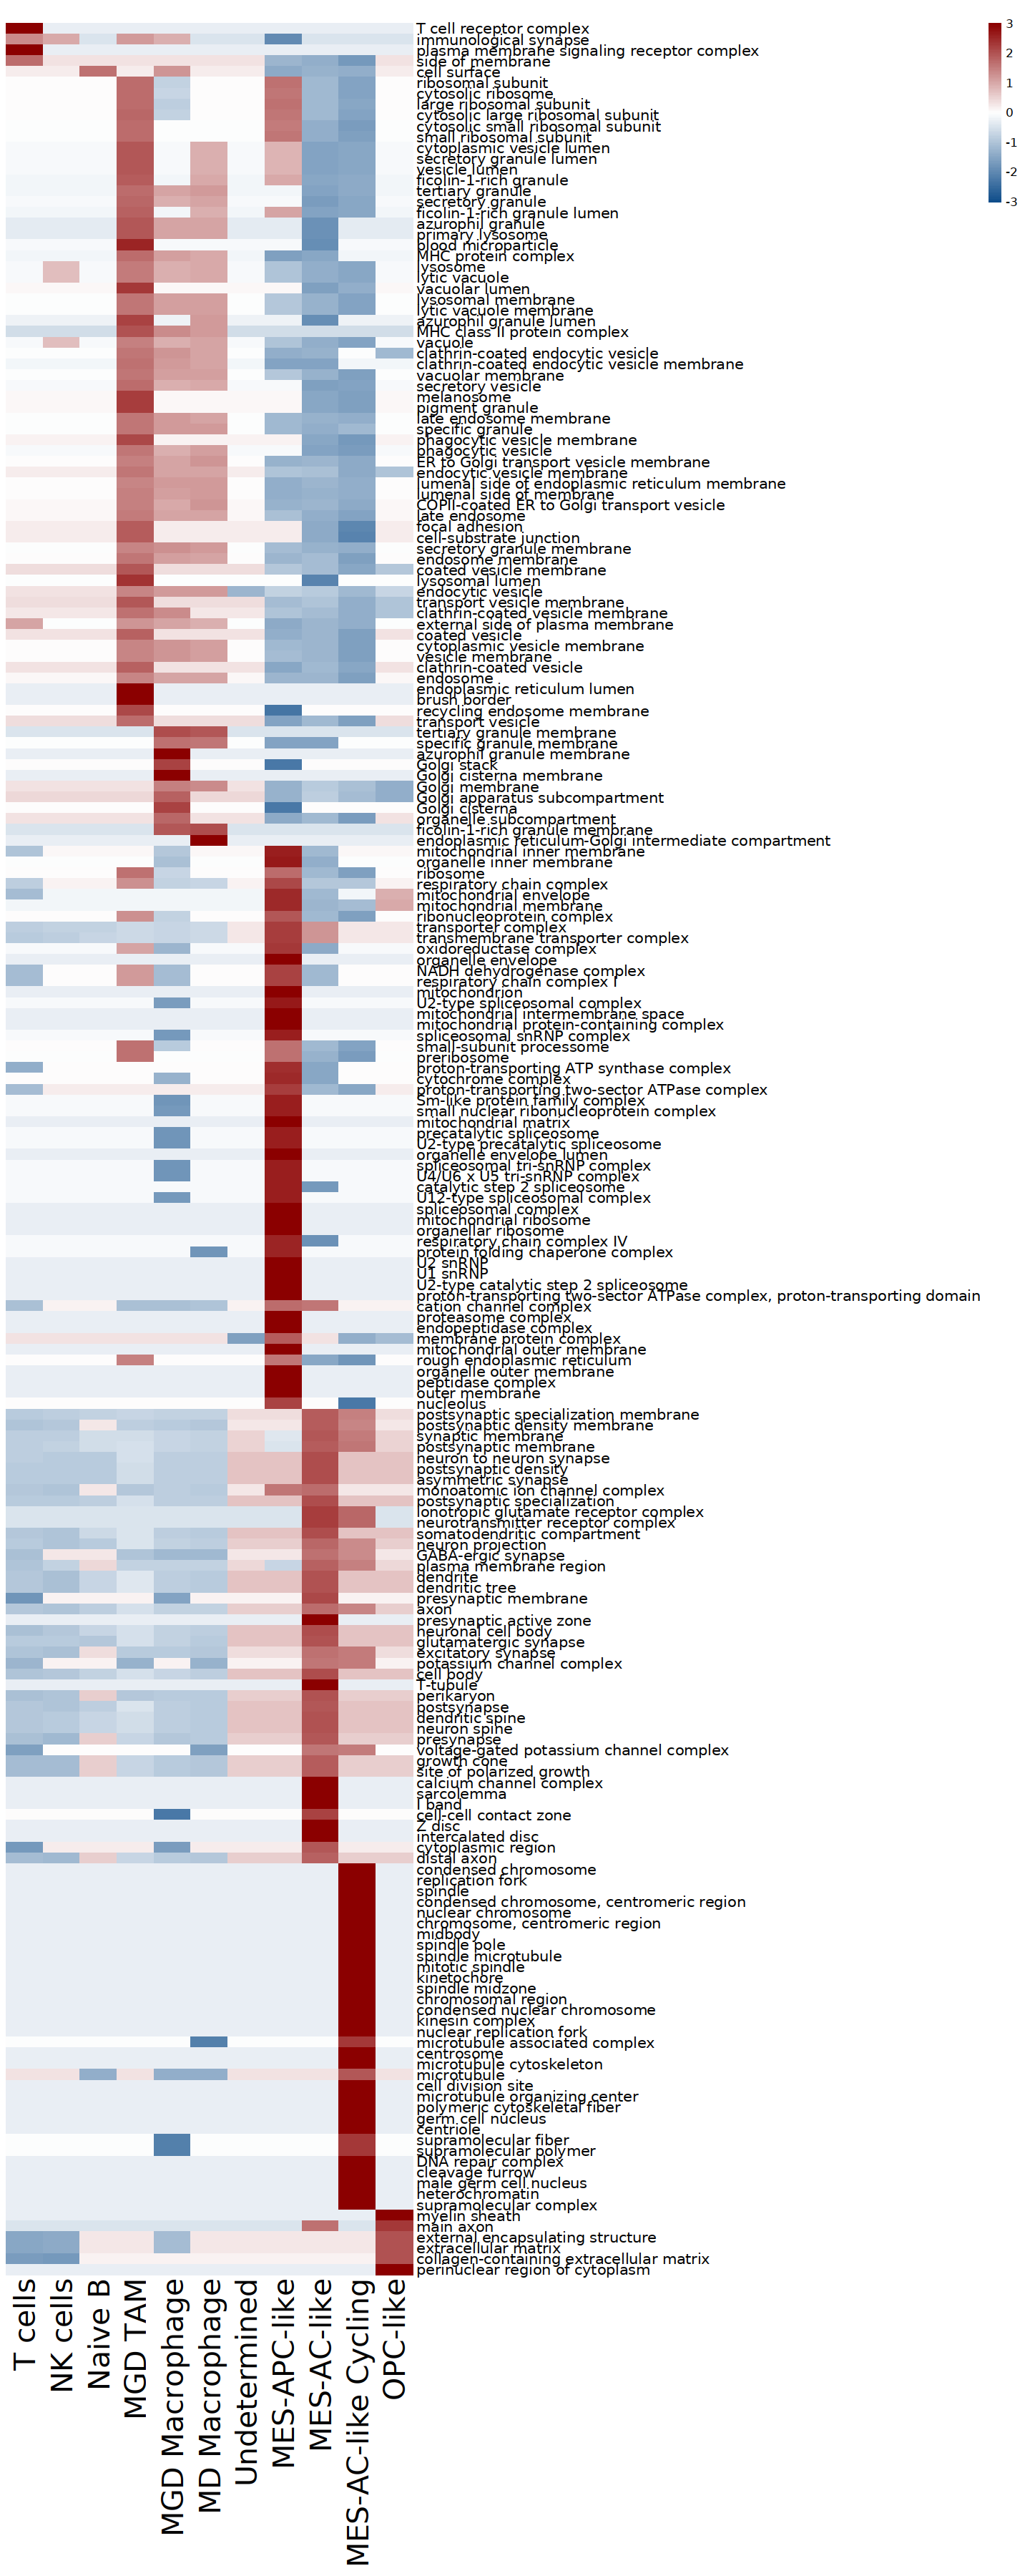

In [15]:
options(repr.plot.width=12, repr.plot.height=30)
p <- plot_pathway_heatmap(gsea_output, cell_order=cell_order, left_margin=unit(0, "cm"))
ggsave("./out/fig1/heatmap_all.png", p, dpi=600, height=30, width=12, create.dir = TRUE)
p